In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Input Variables

In [ ]:
total_money = 100000
rfr = 0.05442
bank_r = 0.0345
stock_0 = [355.67,59.19,54.82,109.45,365.43,148.16,126.56,161.01,151.39,231.53,173.00,314.01,51.52,100.81]
stock_mu = [0.001,0.001,0.001,-0.001,-0.001,0.001,-0.001,0.001,0.001,-0.001,0.001,0.001,-0.001,-0.001] #stock drift
stock_sigma = [0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1] #low var for etf, high var for stocks
n_stock = len(stock_mu)
n_elements = n_stock  + 2
half_yr = 0.0488

# Helper Functions

In [ ]:
def gbm(mu, sigma, initial_price,nsteps=365):
    B = np.random.randn(365)
    steps = [ (mu - (sigma**2)/2) + B[i]*sigma for i in range(nsteps) ]
    y = initial_price*np.exp(np.cumsum(steps))
    return y

def generate_weight(n_elements):
  w = np.random.uniform(0,1,n_elements)
  w = w/sum(w)
  return w


In [ ]:
def sharpe(rp,rfr,std):
  return (rp-rfr)/std

In [ ]:
p=gbm(0.001,0.02,300)
p2=gbm(0.001,0.02,300)

Text(0.5, 1.0, 'Example of 20 simulations of GBM')

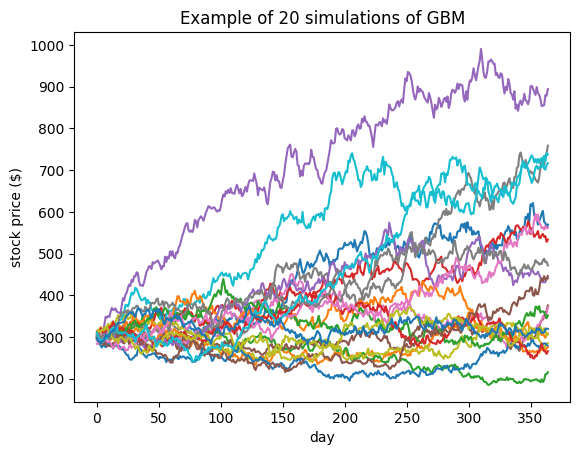

In [ ]:
#example
x=sns.lineplot(p)
for i in range(20):
  sns.lineplot(gbm(0.001,0.02,300),ax=x)
x.set_xlabel('day')
x.set_ylabel('stock price ($)')
x.set_title('Example of 20 simulations of GBM')

# Simulation

In [ ]:
def Simulate(n_elements, total_money, stock_sigma, stock_0, stock_mu,
             bank_r, rfr, n_stock,  investor='risk neutral'):
  if investor == 'risk neutral':
    ERs,Ws,Ss,std= [],[],[],[]
    for weight in range(10000):
      print(weight)
      w = generate_weight(n_elements)
      Ws.append(w)
      #[rf, bank, mutuals, stocks]
      returns = [rfr,bank_r]
      stock_ret=[]
      for stock in range(n_stock):
        #print(f'-------stock no. {stock}-------')
        ret = []
        for n in range(20):
          #print(n)
          price = gbm(stock_mu[stock], stock_sigma[stock], stock_0[stock],nsteps=365)
          r = (price[-1]-price[0])/price[0]
          ret.append(r)
        stock_ret.append(np.mean(ret))
      returns += stock_ret
      ER = np.dot(w,returns)
      sd = np.std(returns)
      std.append(sd)

      ERs.append(ER)

      sigma = np.std(returns)
      Ss.append(sharpe(ER,rfr,sigma))
  return Ws,ERs,Ss,std

In [ ]:
Ws,ERs,Ss,std=Simulate(n_elements, total_money, stock_sigma, stock_0, stock_mu, bank_r, rfr, n_stock)

In [ ]:
np.argmax(ERs),ERs[np.argmax(ERs)],np.argmax(Ss),Ss[np.argmax(Ss)],np.argmin(std),std[np.argmax(std)]

(8388, 8.513846910415783, 2074, 0.9278074524998048, 1281, 30.625246562404275)

In [ ]:
Ws[np.argmax(ERs)]

array([0.08698473, 0.02083137, 0.14570316, 0.00830217, 0.03516912,
       0.00626201, 0.06292143, 0.05141681, 0.07584508, 0.08858299,
       0.04676365, 0.05490004, 0.05243309, 0.09753768, 0.07111559,
       0.09523107])

Text(0.5, 1.0, 'distribution of expected returns')

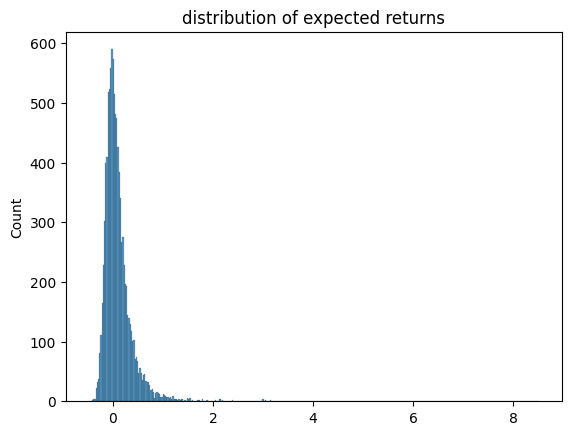

In [ ]:
x=sns.histplot(ERs)
x.set_title('distribution of expected returns')

In [ ]:
def Simulate2(n_elements, total_money, stock_sigma, stock_0, stock_mu,
             bank_r, rfr, n_stock, half_yr,w):
  sell = False
  returns = [rfr,half_yr]
  stock_ret=[]
  for stock in range(n_stock):
    ret = []
    for n in range(20):
      #print(n)
      price = gbm(stock_mu[stock], stock_sigma[stock], stock_0[stock],nsteps=int(365/2))
      r = (price[-1]-price[0])/price[0]
      ret.append(r)
    stock_ret.append(np.mean(ret))
  returns += stock_ret
  returns = np.array(returns) + 1

  if np.mean(stock_ret) < -1:
    sell = True
    stock_w = sum(w[3:])
    w[1]+=stock_w
    w[3:]=0
    print('changed')

  returns2 = [rfr,half_yr]
  stock_ret=[]
  for stock in range(n_stock):
    ret = []
    for n in range(20):
      #print(n)
      price = gbm(stock_mu[stock], stock_sigma[stock], stock_0[stock],nsteps=int(365/2))
      r = (price[-1]-price[0])/price[0]
      ret.append(r)
    stock_ret.append(np.mean(ret))
  returns2 += stock_ret
  returns2 = np.array(returns2) + 1
  returns = returns*returns2

  ER = np.dot(w,returns)-1
  sigma = np.std(np.array(returns)-1)
  sharpe_ratio=sharpe(ER,rfr,sigma)
  return [ER, sigma, sharpe_ratio,sell]

In [ ]:
ERs,Ws,Ss,Sigmas,Sell = [],[],[],[],[]
for weight in range(10000):
  w = generate_weight(n_elements)
  Ws.append(w)
  ER, sigma, sharpe_ratio,sell = Simulate2(n_elements, total_money, stock_sigma, stock_0, stock_mu,
             bank_r, rfr, n_stock, half_yr,w)
  ERs.append(ER)
  Ss.append(sharpe_ratio)
  Sigmas.append(sigma)
  Sell.append(sell)


In [ ]:
np.argmax(ERs),ERs[np.argmax(ERs)],np.argmax(Ss),Ss[np.argmax(Ss)],np.argmax(Ss),Sigmas[np.argmin(Sigmas)],np.argmin(Sigmas),Sell[np.argmax(Ss)]

(646,
 1.7053248817714803,
 558,
 0.8400994858766401,
 558,
 0.29565874992900293,
 8,
 False)

In [ ]:
x=sns.histplot(ERs)
x.set_title('distribution of expected returns')